[1.6157530998310707, 2.10403389573114, 2.9660383651688953]
770.73554542777 0.9950978260872958


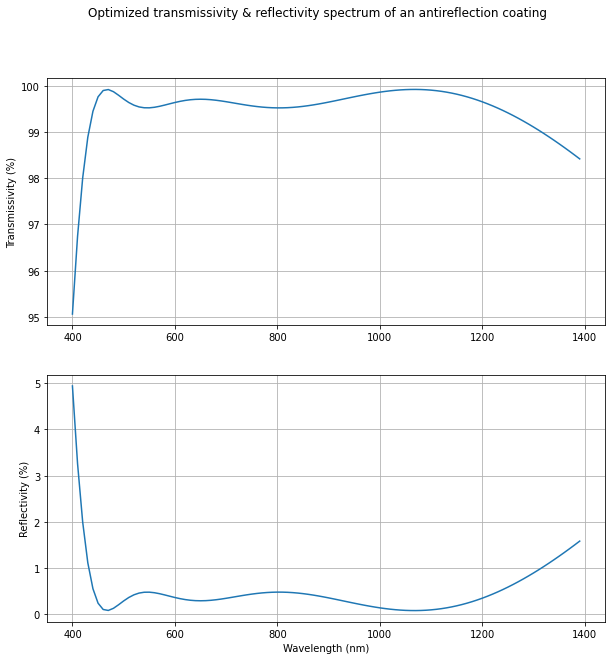

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt 
from tmm import TransferMatrixMethod

import operator
import random

from pso_optimizer import ParticleSwarmOptimizer

pso = ParticleSwarmOptimizer(3, 1000)
pop, logbook, best =pso.optimize()

print(best)

layers = len(best)
CENTRAL_WAVELENGTH_AIR = 650 * math.pow(10, -9)
refractive_indices = {"n0": 1.33}
thickness = {}
for l in range(layers):
    refractive_indices["n"+str(l+1)] = best[l]
    thickness["d"+str(l+1)] = 0.25 * (CENTRAL_WAVELENGTH_AIR/best[l])
refractive_indices["n"+str(layers+1)] = 3.5
tmm = TransferMatrixMethod(layers, materials=refractive_indices,
                            thickness=thickness, spectrum_lower=400, spectrum_upper=1400)
candidate_power = tmm.calculate_power(400, 1400)
ideal_power = TransferMatrixMethod.get_ideal_power(400, 1400) 
print(candidate_power, candidate_power/ideal_power)

spectrum = tmm.calculate_spectrum(400,1400)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

fig.suptitle('Optimized transmissivity & reflectivity spectrum of an antireflection coating')
ax1.plot(spectrum["S"], spectrum["T"])
ax1.set(ylabel='Transmissivity (%)')
ax1.grid()

ax2.plot(spectrum["S"], spectrum["R"])
ax2.set(xlabel='Wavelength (nm)', ylabel='Reflectivity (%)')
ax2.grid()
plt.show()

<table>
    <tr>
        <td>
\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\end{eqnarray}
        </td>
        <td>
\begin{eqnarray}
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{eqnarray}
        </td>
    </tr>
</table>

<table>
    <tr>
        <td>
\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\end{eqnarray}
        </td>
        <td>
\begin{eqnarray}
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{eqnarray}
        </td>
    </tr>
</table>

In [2]:


refractive_indices = {
    "n0":1.33,
    "n1":1.4,
    "n2":2.27,
    "n3":3.5,
}

refractive_indices = {
    "n0":1.33,
    "n1":1.7744376377480535,
    "n2":2.6206093988108847,
    "n3":3.5,
}

refractive_indices = {
    "n0":1.33,
    "n1":1.5531345306423345, 
    "n2":2.180878353559565,
    "n3": 2.9918845280975717, 
    "n4":3.5,
}
 

CENTRAL_WAVELENGTH_AIR = 650 * math.pow(10, -9)
thickness = {
    "d1" : 0.25*(CENTRAL_WAVELENGTH_AIR/1.5531345306423345),
    "d2" : 0.25*(CENTRAL_WAVELENGTH_AIR/2.180878353559565),
    "d2" : 0.25*(CENTRAL_WAVELENGTH_AIR/2.9918845280975717),
}

#.calculate_spectrum(lower_bounds,upper_bounds))
import time
s = time.time()
lower_bounds = 400
upper_bounds = 1400
tmm = TransferMatrixMethod(2, materials=refractive_indices, thickness=thickness)
print(tmm.calculate_power(400,1400))
e = time.time()
print(e-s)


759.2321599887715
0.022314786911010742


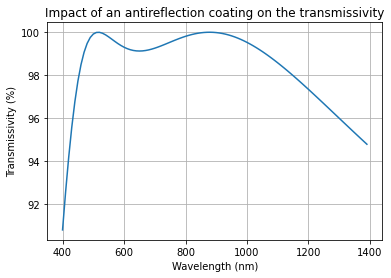

In [3]:
spectrum = tmm.calculate_spectrum(400,1400)
fig, ax = plt.subplots()
ax.plot(spectrum["S"], spectrum["T"])
ax.set(xlabel='Wavelength (nm)', ylabel='Transmissivity (%)',title='Impact of an antireflection coating on the transmissivity')
ax.grid()
plt.show()

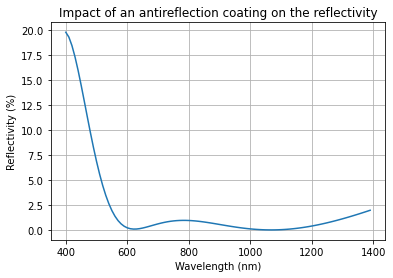

In [7]:
fig, ax = plt.subplots()
ax.plot(spectrum["S"], spectrum["R"])
ax.set(xlabel='Wavelength (nm)', ylabel='Reflectivity (%)',title='Impact of an antireflection coating on the reflectivity')
ax.grid()
#fig.savefig("/Users/lorbetskie/Desktop/test.png")
#ax[1].plot(wavelength, transmissivity)
#ax[1].set(xlabel='Wavelength (nm)', ylabel='Transmissivity (%)')
#ax[1].grid()
plt.show()

<table>
    <tr>
        <td>
\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\end{eqnarray}
        </td>
        <td>
\begin{eqnarray}
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{eqnarray}
        </td>
    </tr>
</table>

In [6]:
tmm.dynamical_matrix

{'Q01': array([[ 1.02631579, -0.02631579],
        [-0.02631579,  1.02631579]]),
 'Q12': array([[ 1.31071429, -0.31071429],
        [-0.31071429,  1.31071429]]),
 'Q23': array([[ 1.27092511, -0.27092511],
        [-0.27092511,  1.27092511]])}

In [2]:
pso = ParticleSwarmOptimizer(3)

NameError: name 'generate' is not defined